In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import soundfile as sf
import math
from scipy import integrate
from scipy.fftpack import fft

## Better working implementations

In [13]:
#https://epb.bibl.th-koeln.de/frontdoor/deliver/index/docId/1161/file/Musik_Frequenzen_Formeln_Klingen_2018_04_24.pdf

#function to calculate octave+note of a given frequency
def calculate_note(frequency):
    f0 = 130.81 #base sound c0
    fh = frequency * 2**(1/24)
    x = math.log2(fh/f0)
    k = math.floor(x) #k is the octave of your tone
    h1 = (x-k) * 12
    h2 = math.floor(h1)
    n = h2 + 1 #n is the tone, see table on page 3 in the source (1 = c, 2 = cis, 3 = d, ...)
    h3 = (h1-h2) * 100
    cent = round(h3-50) #cent is a number between -50<cent<50 and tells you how accurate the note is. the closer to 0 the better
    print('Octave:', k)
    print('Tone:   ', end = '')
    if(n == 1):
        print('C')
    elif(n == 2):
        print('Cis')
    elif(n == 3):
        print('D')
    elif(n == 4):
        print('Dis')
    elif(n == 5):
        print('E')
    elif(n == 6):
        print('F')
    elif(n == 7):
        print('Fis')
    elif(n == 8):
        print('G')
    elif(n == 9):
        print('Gis')
    elif(n == 10):
        print('A')
    elif(n == 11):
        print('Ais')
    else:
        print('H')
    print('Cent:  ', cent)
    
calculate_note(440)

Octave: 1
Tone:   A
Cent:   0


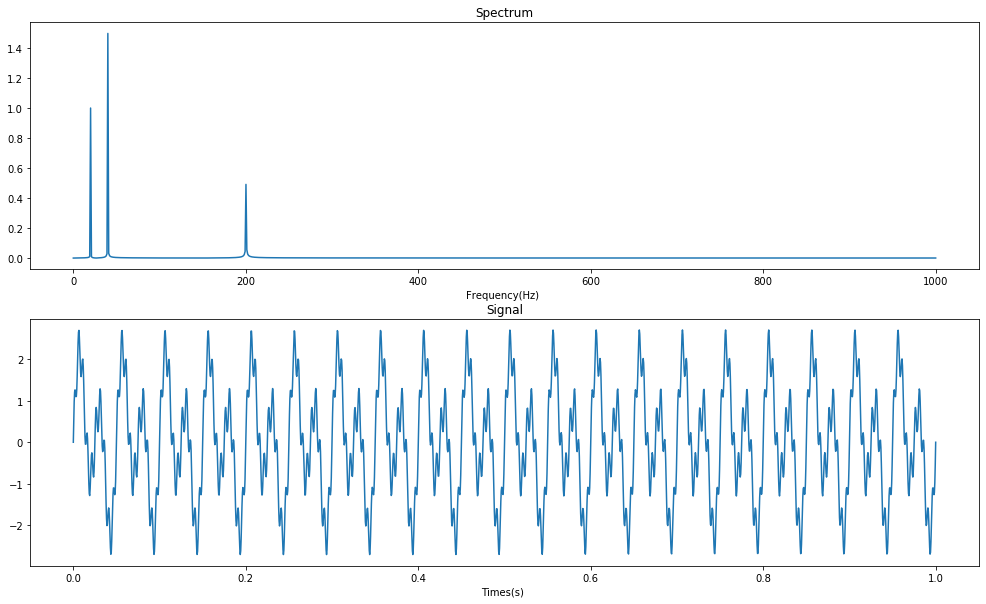

In [9]:
Fs=2000

time=np.linspace(0,1,Fs) #
dataL=np.sin(2*np.pi * 20 * time) + 1.5*np.sin(2*np.pi * 40 * time) + 0.5 * np.sin(2*np.pi * 200 * time)
n=time.size #number of samples
frequencies = np.linspace(0,Fs/2,n/2)#freq we want to plot (only half because of doulbe information)

ft=fft(dataL)
ft_m = (2/n)*abs(ft[0:n//2])

plt.figure(figsize=(17,10))
plt.subplot(2,1,1)
plt.plot(frequencies,ft_m)
plt.title("Spectrum")
plt.xlabel("Frequency(Hz) ")
plt.subplot(2,1,2)
plt.title("Signal")
plt.xlabel("Times(s) ")
plt.plot(time,dataL[0:Fs])

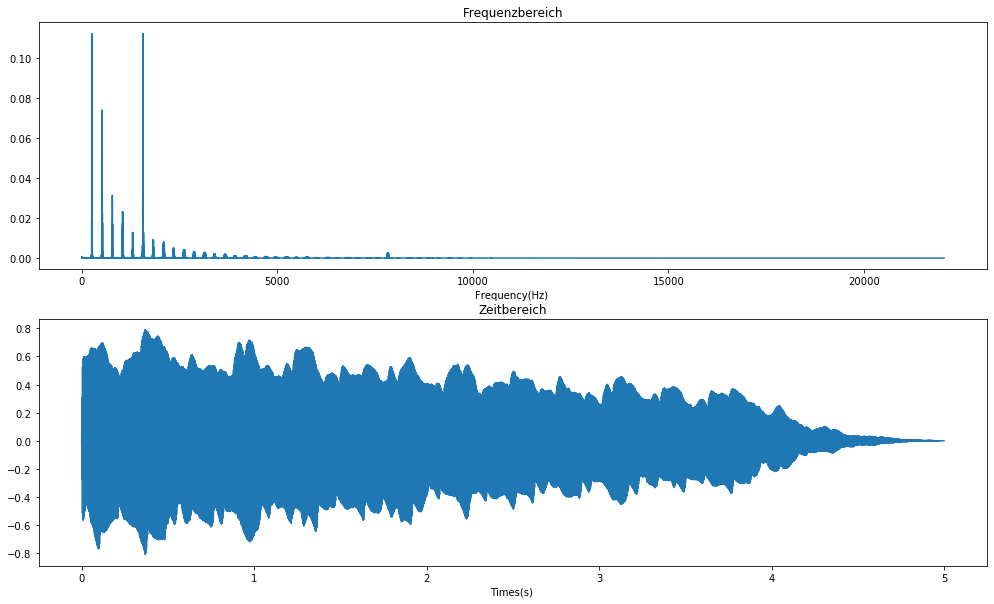

In [10]:

data, samplerate = sf.read('Ensoniq-ESQ-1-Sympy-C4.wav')
dataL=data[:,0]

Fs=samplerate #testing frequency (Abtastrate) so viele Datenpunkte werden gemessen
time=np.linspace(0,5,len(dataL)) # time values,time=np.linspace(0,1,Fs) # time values

n=time.size #number of samples
frequencies = np.linspace(0,Fs/2,n/2)#freq we want to plot (only half because of doulbe information)
#print("resolution:",frequencies[1]-frequencies[0])
ft=fft(dataL)
ft_m = (2/n)*abs(ft[0:n//2])


plt.figure(figsize=(17,10))
plt.subplot(2,1,1)

#1. Graph : Frequenzbereich des Signals
plt.plot(frequencies,ft_m)
plt.title("Frequenzbereich")
plt.xlabel("Frequency(Hz) ")
# plt.xlim(1500,1500)

#2. Graph: Zeitbereich des Signals
plt.subplot(2,1,2)
plt.title("Zeitbereich")
plt.xlabel("Times(s) ")
plt.plot(time,dataL)

In [12]:
count=0
windowSize=100
peakFreqs=[]
peakVals=[]
#TODO: replace with better window function (gaussian?)
#this is supposed to filter out leakage that occur due to the error term in FFT 
for i in range(len(ft_m[:-20])):
    if(ft_m[i] > 0.025):
#         print(ft_m[i])
#         print(frequencies[i])
        greatest=True
        for k in range(i-windowSize//2,i+windowSize//2):
            if(ft_m[k]>ft_m[i]):
                greatest=False
                break
        if greatest:
            print(i,ft_m[i],frequencies[i])
            peakFreqs.append(frequencies[i])
            peakVals.append(ft_m[i])
            count+=1  
        
print("count",count)
print(peakFreqs)
print(peakVals)

for peak in peakFreqs:
    calculate_note(peak)

1508 0.11227475191932092 261.1598938125383
3017 0.07410737306683583 522.4929705785331
4525 0.03143324322063626 783.6528643910715
9044 0.1123680593996056 1566.2666310614034
count 4
[261.1598938125383, 522.4929705785331, 783.6528643910715, 1566.2666310614034]
[0.11227475191932092, 0.07410737306683583, 0.03143324322063626, 0.1123680593996056]
Octave: 1
Tone:   C
Cent:   -3
Octave: 2
Tone:   C
Cent:   -2
Octave: 2
Tone:   G
Cent:   -1
Octave: 3
Tone:   G
Cent:   -2
